# Módulos

In [1]:
import os # Sistema (arquivos)
import pandas as pd # Tabelas
import matplotlib.pyplot as plt # Gráficos

cores = {
    
    'valor': (0/255, 98/255, 105/255),
    'valorinveste': (71/255, 47/255, 146/255),
    'pipelinevalor': (158/255, 0/255, 93/255),
    'globorural': (52/255, 131/255, 68/255),
    'epocanegocios': (0/255, 0/255, 0/255),
    'revistapegn': (246/255, 84/255, 17/255),
    'umsoplaneta': (97/255, 155/255, 19/255)
}

nomes = {
    
    'valor': 'Valor Econômico',
    'valorinveste': 'Valor Investe',
    'pipelinevalor': 'Pipeline (Valor)',
    'globorural': 'Globo Rural',
    'epocanegocios': 'Época Negócios',
    'revistapegn': 'Revista PEGN',
    'umsoplaneta': 'Um Só Planeta'

}

# Visualização

## Bases

In [2]:
arquivos = [arquivo for arquivo in os.listdir('perplexidades') if '.xlsx' in arquivo and 'batch' in arquivo and 'agregação' not in arquivo]
portais = list(map(lambda x: x.split(' - ')[0], arquivos))

dfs = []
for arquivo, portal in zip(arquivos, portais):
    df = pd.read_excel(f'perplexidades/{arquivo}')
    df['Portal'] = portal
    dfs.append(df)

amostras_de_perplexidade = pd.concat(dfs)
perplexidades_médias = amostras_de_perplexidade.groupby(['Método', 'Portal', 'Nº de tópicos']).mean().reset_index()
perplexidades_mínimas = perplexidades_médias.sort_values('Perplexidade').drop_duplicates(subset = 'Portal')

parâmetros_ótimos = perplexidades_mínimas[['Portal', 'Método', 'Nº de tópicos']].copy()
parâmetros_ótimos.columns = 'selection method n_components'.split()
parâmetros_ótimos.to_excel('parâmetros ótimos para o método batch.xlsx', index = False)

## Formatação abrangente

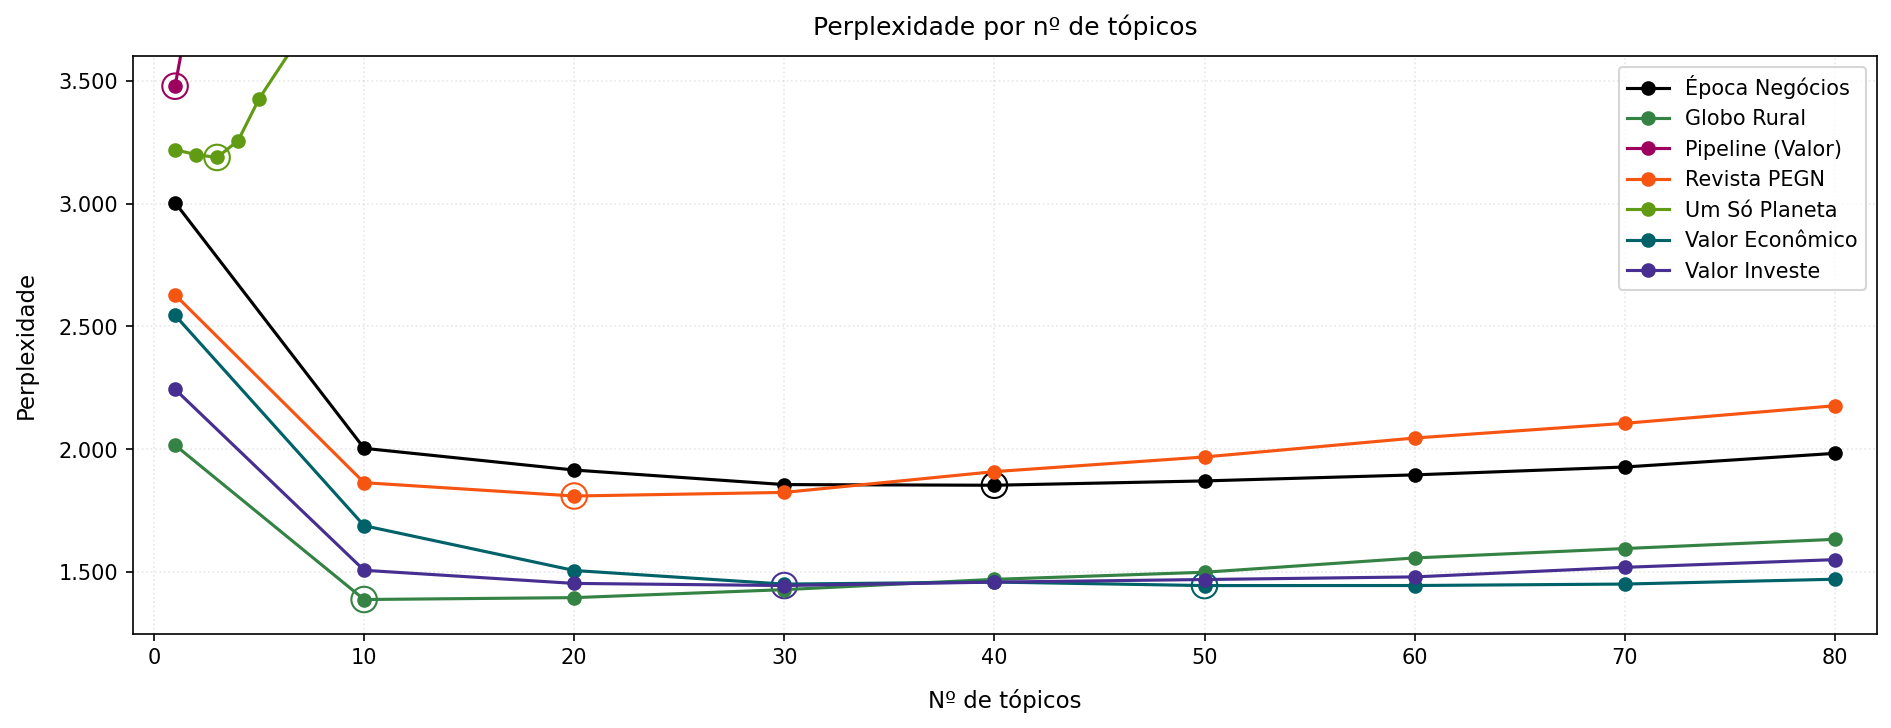

In [4]:
plt.figure(figsize = (15,5), dpi = 150)
plt.title(f'Perplexidade por nº de tópicos', pad=10)
for portal in sorted(set(portais)):
    amostra_de_perplexidade = amostras_de_perplexidade[amostras_de_perplexidade.Portal == portal].copy()
    if portal in ('pipelinevalor', 'umsoplaneta'):
        amostra_de_perplexidade = amostra_de_perplexidade[amostra_de_perplexidade['Nº de tópicos'] < 40].copy()
    xs,ys = amostra_de_perplexidade['Nº de tópicos'], amostra_de_perplexidade['Perplexidade']
    
    perplexidade_média = amostra_de_perplexidade.groupby(['Método', 'Portal', 'Nº de tópicos']).mean().reset_index()
    x,y = perplexidade_média['Nº de tópicos'], perplexidade_média['Perplexidade']
    plt.plot(x, y, color = cores[portal], marker = 'o', label = nomes[portal])
    plt.scatter(*perplexidades_mínimas[perplexidades_mínimas.Portal == portal][['Nº de tópicos', 'Perplexidade']].T.values.tolist(),
                color = cores[portal], s = 150, facecolors = 'none', edgecolors = cores[portal], linewidths = 1)

plt.grid(linestyle = ':', alpha = .3)
plt.ylim(1250,3600)
plt.xlim(-1,82)

yticks = plt.yticks()[0][1:-1]
ytick_labels = [f'{ytick:,.0f}'.replace(',', '.') for ytick in yticks]
plt.yticks(yticks, ytick_labels)

plt.ylabel('Perplexidade', labelpad=10, fontsize=11)
plt.xlabel('Nº de tópicos', labelpad=10, fontsize=11)

plt.legend()
plt.show()

## Formatação para o artigo

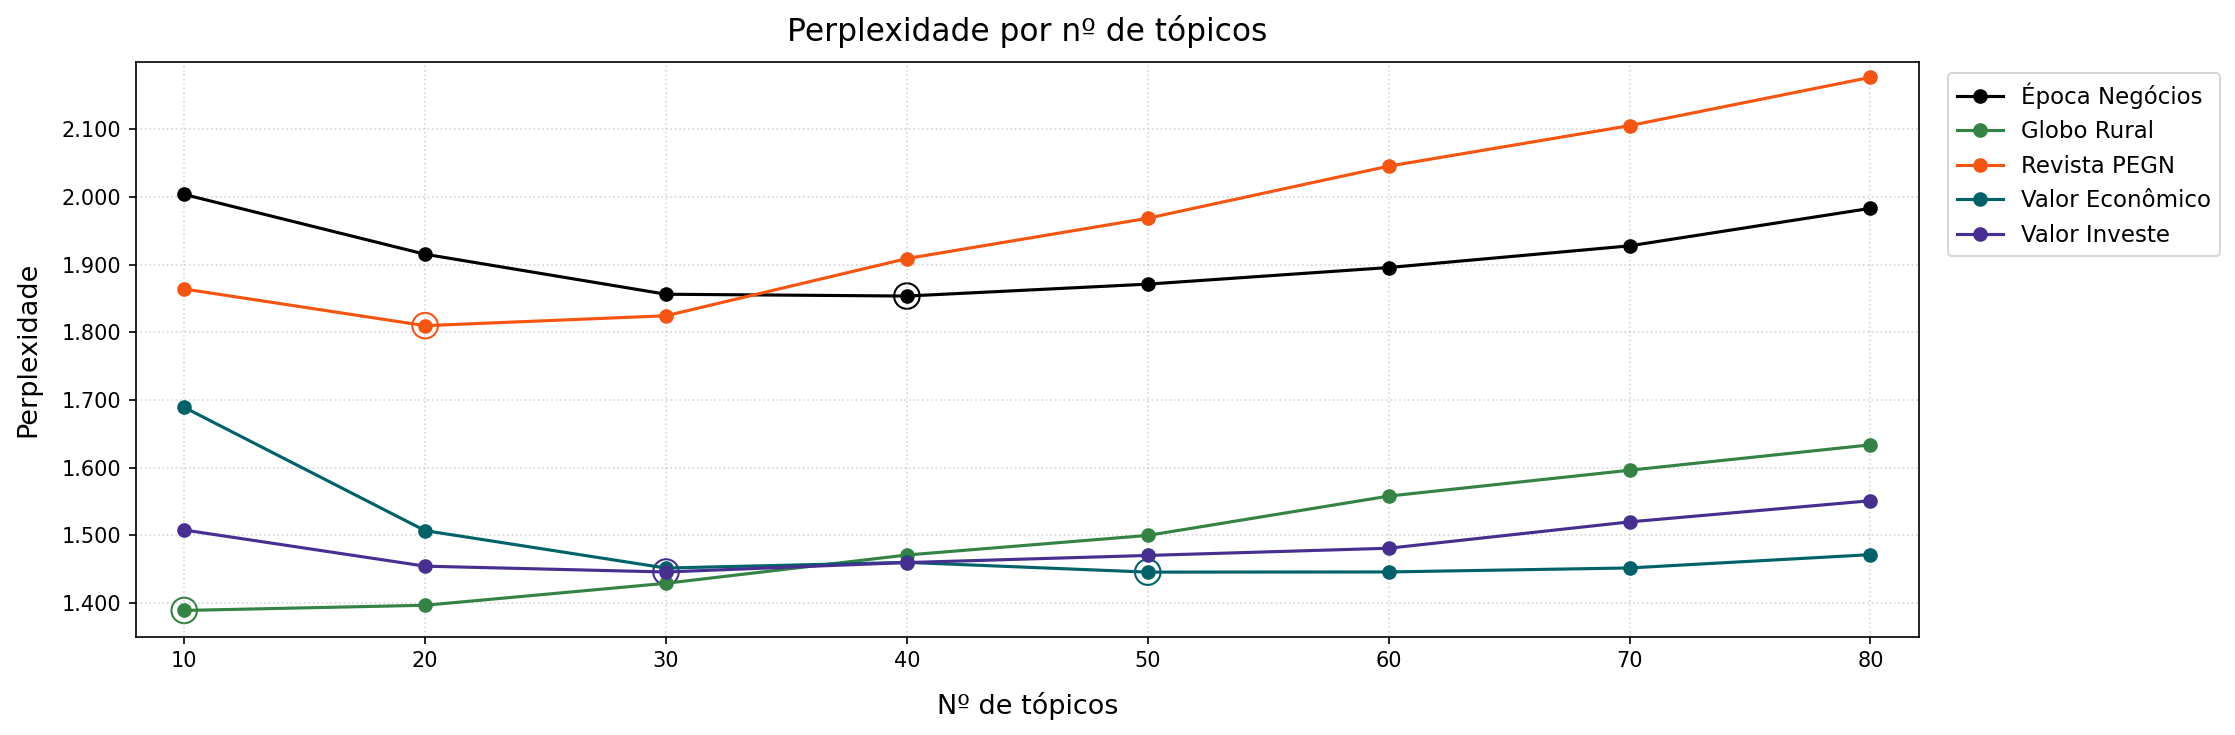

In [3]:
plt.figure(figsize = (15,5), dpi = 150)
plt.title(f'Perplexidade por nº de tópicos', pad=10, fontsize = 15)

for portal in sorted(set(portais)):
    amostra_de_perplexidade = amostras_de_perplexidade[amostras_de_perplexidade.Portal == portal].copy()
    amostra_de_perplexidade = amostra_de_perplexidade[amostra_de_perplexidade['Nº de tópicos'] > 1].copy()
    if portal in ('pipelinevalor', 'umsoplaneta'):
        continue
        amostra_de_perplexidade = amostra_de_perplexidade[amostra_de_perplexidade['Nº de tópicos'] < 40].copy()
    
    xs, ys = amostra_de_perplexidade['Nº de tópicos'], amostra_de_perplexidade['Perplexidade']
    perplexidade_média = amostra_de_perplexidade.groupby(['Método', 'Portal', 'Nº de tópicos']).mean().reset_index()
    x, y = perplexidade_média['Nº de tópicos'], perplexidade_média['Perplexidade']
    
    plt.plot(x, y, color = cores[portal], marker = 'o', label = nomes[portal])
    plt.scatter(*perplexidades_mínimas[perplexidades_mínimas.Portal == portal][['Nº de tópicos', 'Perplexidade']].T.values.tolist(),
                color = cores[portal], s = 150, facecolors = 'none', edgecolors = cores[portal], linewidths = 1)

plt.grid(linestyle = ':', alpha = .5)
plt.ylim(1350,2200)
plt.xlim(8,82)

yticks = plt.yticks()[0][1:-1]
ytick_labels = [f'{ytick:,.0f}'.replace(',', '.') for ytick in yticks]
plt.yticks(yticks, ytick_labels)

plt.ylabel('Perplexidade', labelpad=10, fontsize=13)
plt.xlabel('Nº de tópicos', labelpad=10, fontsize=13)

plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=11)
plt.tight_layout()
plt.show()